In [2]:
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [3]:
# Retrieve credentials
with open("/Users/tiffanivick/Desktop/credentials.json") as f:
  data = json.load(f)
  mongo_connection_string = data ['mongodb']
  
# Fetch the database named "DB1"
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
db1_database = client['DB1']
metacritic_data = db1_database['metacritic_new_2']
metacritic = pd.DataFrame(metacritic_data.find())

In [4]:
# Convert release dates into actual dates and gather year/month
metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.score = pd.to_numeric(metacritic.score)
metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail,year,month
0,6365b284f479801c9e932cb5,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6365b284f479801c9e932cb6,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6365b284f479801c9e932cb7,11236,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6365b284f479801c9e932cb8,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6365b284f479801c9e932cb9,11238,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


### Movie Analysis - number of movies by the release year

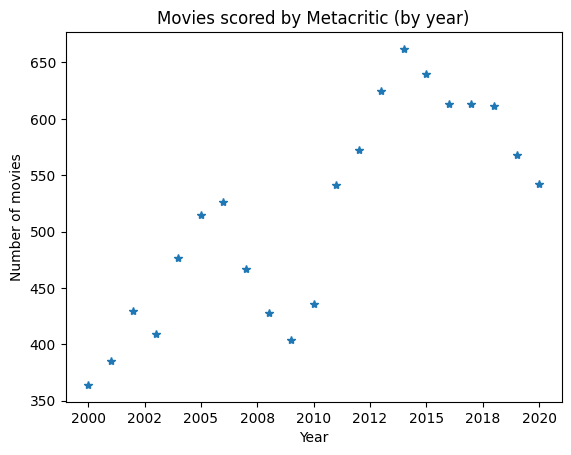

In [5]:
# Set up labels on the axes
plt.title('Movies scored by Metacritic (by year)')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Count movies measured by metacritic by year and plot the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
plt.plot(df, '*')
# Prevent matplotlib from rendering years with decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

It appears that 2014 had the most movies released in a year.

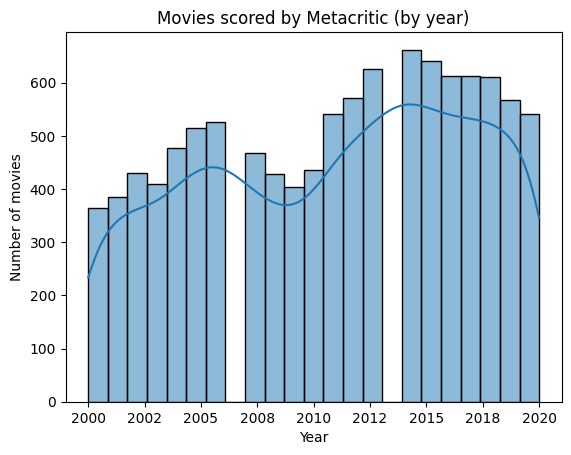

In [6]:
# Set up labels on the axes
plt.title('Movies scored by Metacritic (by year)')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Count movies measured by metacritic by year and plot the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
sns.histplot(df, x=metacritic.year, kde=True)
# Prevent matplotlib from rendering years with decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

Alright, so there seems to be a trend in the number of movies released through the years. From 2000 to 2006 the number of movies released increases and then decreases from 2006 to 2009, continuing this pattern over the years. This, however might have to do with the fact that COVID hit in 2019, resulting in a hold of movies productions.  

Visually, it appears that 2014 had the most movies realeased in a year. 

To check this observation, printing out the actual number of movies per year will confirm analysis. 

In [7]:
df['release_date'].count()

year
2000    364
2001    385
2002    430
2003    409
2004    477
2005    515
2006    526
2007    467
2008    428
2009    404
2010    436
2011    541
2012    572
2013    625
2014    662
2015    640
2016    613
2017    613
2018    611
2019    568
2020    542
Name: release_date, dtype: int64

Now that the observation has been confirmed, how does the count of movies differ through the months in 2014.

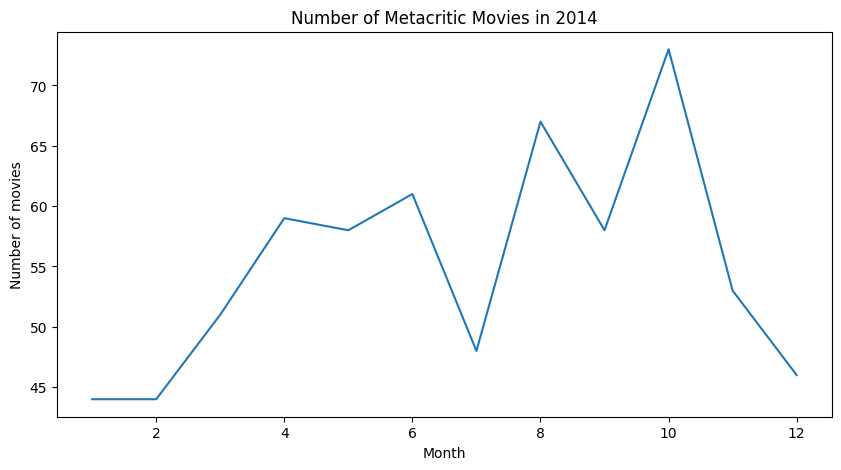

In [8]:
# Empty dictionary to hold the count of movies for year monthh in a year
monthlyMovieCount = {}

# Assigning year variable
year = 2014

# Filtering dataframe to show the specified year
moviesInYear = metacritic[metacritic['release_date'].apply(lambda x: x.year == year)]

# Looping through to get the count of movies for each month
for ts in moviesInYear['release_date']:
  # If the key is in the dictionary then add 1 to its count
  if ts.month in monthlyMovieCount: 
    monthlyMovieCount[ts.month] = monthlyMovieCount.get(ts.month) + 1
  # If key is not in dictionary then add it with its count
  else:
    monthlyMovieCount[ts.month] = 1
    
# specify the height and width of the chart
plt.figure(figsize=(10, 5))    

# Plotting a line chart to get the count of movies by month
fig = sns.lineplot(data=monthlyMovieCount)
plt.title('Number of Metacritic Movies in 2014')
plt.xlabel('Month')
plt.ylabel('Number of movies')
plt.show(fig)

Visually, it's plain to see that October had the greatest number of movies released in 2014. 

### Movie Analysis - metascores by the release year

First, looking at how metascores have changed over the years may be helpful.

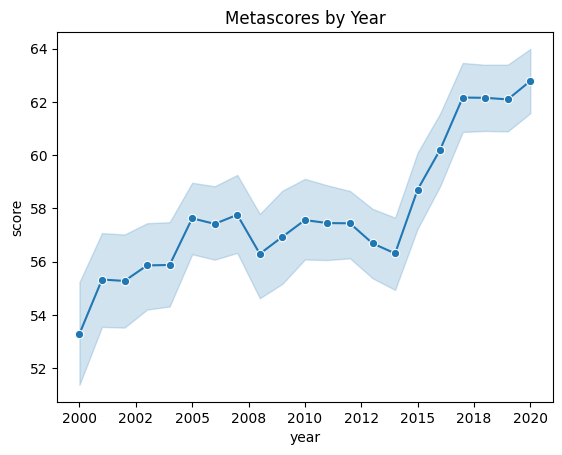

In [9]:
sns.lineplot(x='year', y='score', data=metacritic, marker='o')
plt.title('Metascores by Year')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

There appears to definitely be a positive trend over time. 

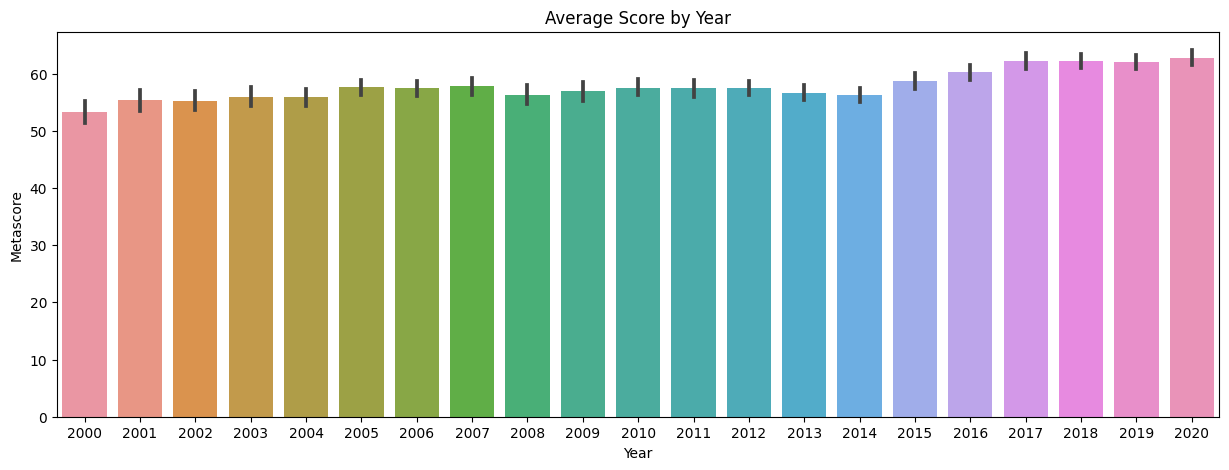

In [10]:
# Set up figure size
plt.figure(figsize=(15, 5))

g = sns.barplot(x='year', y='score', data=metacritic)

# Set up title and axis lables
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Metascore')
plt.legend([],[], frameon=False)
plt.show(g)

### Comparing Two Different Years 

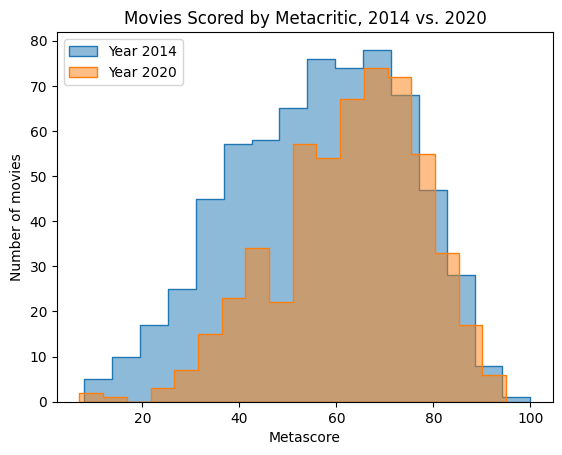

In [11]:
# Retrieve metascore for two different years
scores_2014 = metacritic[metacritic['year'] == 2014].score
scores_2020 = metacritic[metacritic['year'] == 2020].score

sns.histplot(scores_2014, element='step', alpha=0.5, label='Year 2014')
sns.histplot(scores_2020, element='step', alpha=0.5, label='Year 2020')

# Set up title and axis lables
plt.title('Movies Scored by Metacritic, 2014 vs. 2020')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.legend(loc='upper left')
plt.show()

Although more movies were reased in 2014, it appears that metascores have increased in 2020, with majority of metascores being higher. This is also noticable by the skewness of the graph, with 2020 plot being more right-skewed than 2014. 

It might be interesting to see the difference in metascores from 2014 versus 2015 since these two years hold the highest number of movies released.

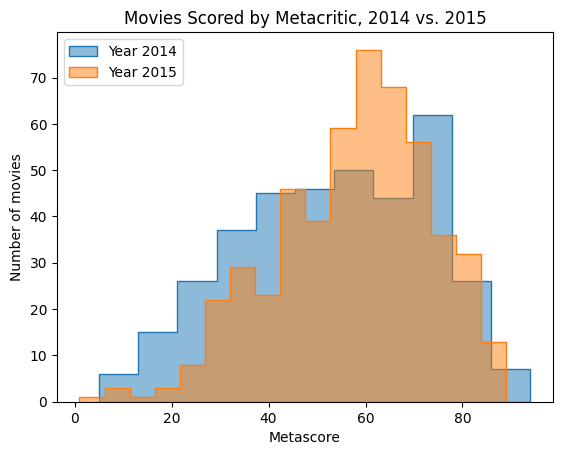

In [12]:
# Retrieve metascore for two different years
scores_2014 = metacritic[metacritic['year'] == 2000].score
scores_2015 = metacritic[metacritic['year'] == 2005].score

sns.histplot(scores_2014, element='step', alpha=0.5, label='Year 2014')
sns.histplot(scores_2015, element='step', alpha=0.5, label='Year 2015')

# Set up title and axis lables
plt.title('Movies Scored by Metacritic, 2014 vs. 2015')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.legend(loc='upper left')
plt.show()

Visually, majority of metascores in 2014 seem to be higher than those in 2015. 

### Comparing Two Different Features

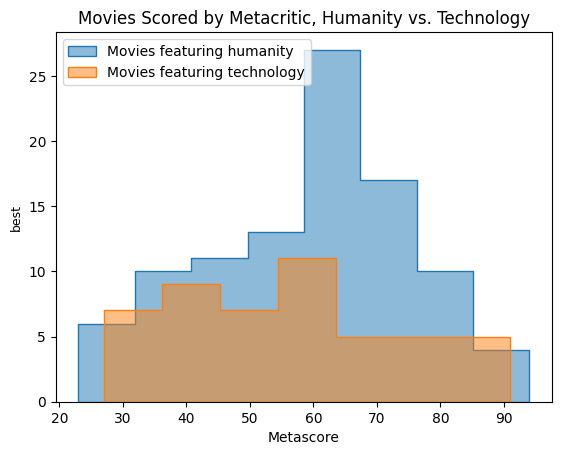

In [13]:
# Retrieve metascore for two different years
scores_technology = metacritic[metacritic['description'].str.contains('technology')].score
scores_humanity = metacritic[metacritic['description'].str.contains('humanity')].score

sns.histplot(scores_humanity, element='step', alpha=0.5, label='Movies featuring humanity')
sns.histplot(scores_technology, element='step', alpha=0.5, label='Movies featuring technology')


# Set up title and axis lables
plt.title('Movies Scored by Metacritic, Humanity vs. Technology')
plt.xlabel('Metascore')
plt.ylabel('best', fontsize=9)
plt.legend(loc='upper left')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

There are far more movies featuring humanity than technology. Movies featuring humanity also have higher metascore.

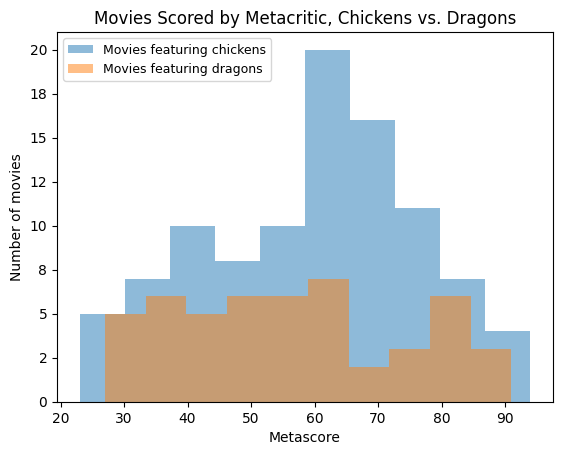

In [14]:
# Retrieve metascores for two different topics
scores_chicken = metacritic[metacritic['title'].str.contains('chicken')].score
scores_dragon = metacritic[metacritic['title'].str.contains('dragon')].score

# Plot into buckets
plt.title('Movies Scored by Metacritic, Chickens vs. Dragons')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.hist(scores_humanity, alpha=0.5, label='Movies featuring chickens')
plt.hist(scores_technology, alpha=0.5, label='Movies featuring dragons')
plt.legend(loc='best', fontsize=9)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

More movies feature chickens over dragons and are scored higher.